## Entscheidung für die Programmierumgebung

Zunächst einmal habe ich mir überlegt, in welcher Programmierumgebung und vor allem -sprache ich die Ausarbeitung umsetzten möchte. Aus verschiedensten Gründen habe ich mich für Python und Jupyter entschieden:

1. In meinem Beruf habe ich bereits Erfahrung mit Python gesammelt. Außerdem habe ich ein Udacity Nanodegree in Deep Learning abgeschlosse, wo die Programmiersprache ebenfalls Python war. Daher fällt mir der Einsteig leichter.
2. Python hat sich in den letzten Jahren zur Nummer 1 Sprache im Data Science Umfeld entwickelt. Es gibt zahlreiche Bibliotheken, die die Umsetzung von Data Science Projekten erleichtert.
3. Jupyter ist eine Bibliothek, die es ermöglicht, Code und Markdown zu vereinen. Somit kann man die Code direkt beschreiben und eine Story aufbauen. Die Ideen und Analysen des Entwicklers können einfacher nachvollzogen werden. Der Code kann quasi wie ein Buch gelesen werden.


## Bibliotheken einlesen

Für das Aufbereiten und Visualisieren, sowie für die Erstellung der Machine Learning Modelle werden verschiedene Bibliotheken benötigt. Folgende Python Bibiliotheken werden zur Durchführung der Analysen verwendet:

**pandas**

Mit der [**pandas**](https://pandas.pydata.org/) Bibiliothek können Daten aus verschiedenen Formaten in ein Data Frame eingelesen werden. Es stehen weiterhin Funktionen für die Datenbereinigung, für das Aggregieren oder Transformieren von Daten und anderen Dingen zur Verfügung.

---

**matplotlib**

[**matplotlib**](https://matplotlib.org/) ist eine weit verbreitete Python Bibliothek mit der man verschiedene Charts erstellen kann. Sie bietet viele Konfigurationsmöglichkeiten, um auch komplexe Darstellungen zu ermöglichen

---

**seaborn**

Die [**seaborn**](https://seaborn.pydata.org/) Bibliothek baut auf der Library matplotlib auf und ermöglicht es, mit einfacher Syntax anschauliche Datenvisualisierungen zu erzeugen. Im Vergleich zu matplotlib wirken die Grafiken moderner und sind mit weniger Kommandos zu erstellen.

---

**plotly**

Die [**plotly**](https://plotly.com/) ..

---

**sklearn**

Die [**sklearn**](https://scikit-learn.org/stable/) ..

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# For ML models
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 


import warnings
warnings.filterwarnings("ignore")

## Überblick über die Daten erhalten

Im nächsten Schritt wird sich ein Überblick über die Daten verschafft. Dabei werden die einzelnen Variablen betrachtet und beschrieben.

Dazu werden die Daten aus der CSV-Datei *train.csv* in ein pandas DataFrame *df* eingelesen. Anschließend wird mit dem Aufruf des DataFrame-Namen eine Übersicht des Datasets ausgegeben.

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


Aus der Übersicht geht hervor, dass der Datensatz aus insgesamt 319795 Zeilen und 18 Spalten besteht. Sowohl die Anzahl Zeilen also auch die Anzahl der Spalten eignet sich sehr gut für die Entwicklung eines aussagekräftigen Modells. Für ein besseres Verständnis des Datasets werden im folgenden die Beschreibungen der Spalten aufgeführt:

| Variable      | Beschreibung |
| :-----------   | :-----------  |
| **HeartDisease**  | **Zielvariable**. Befragte, die jemals eine koronare Herzkrankheit (KHK) oder einen Myokardinfarkt (MI) hatten   |
| BMI     | Body Mass Index (BMI)         |
| Smoking | Haben die Probanden in ihrem Leben mehr als 100 Zigaretten geraucht? |
| AlcoholDrinking | Starke Trinker (erwachsene Männer mit mehr als 14 Getränken pro Woche und erwachsene Frauen mit mehr als 7 Getränken pro Woche) |
| Stroke | Wurde dem Probanden jemals gesagt, dass er einen Schlaganfall hatte? |
| PhysicalHealth | An wie viele der letzten 30 Tage hatten die Probanden physische körperliche Beschwerden |
| MentalHealth | An wie viele der letzten 30 Tage hatten die Probanden psychische Beschwerden |
| DiffWalking | Haben die Probanden starke Beschwerden, Treppen zu steigen? |
| Sex | Geschlecht der Probanden |
| AgeCategory | Alterskategorie (insgesamt 14 Kategorien) |
| Race | Rasse / Ethnizität |
| Diabetic | Hatte der Proband jemals Diabetes? |
| PhysicalActivity | Hat der Proband in den letzten 30 Tagen Sport gemacht |
| GenHealth | Wie schätzt der Proband seine Gesundheite ein -> Exzellent / Sehr gut / gut / angemessen / schlecht |
| SleepTime | Durschnittliche Schlafzeit in Stunden |
| Asthma | Hatte der Proband jemals Asthma? |
| KidneyDisease | Wurde dem Probanden jemals gesagt, dass Sie eine Nierenerkrankung haben, ausgenommen Nierensteine, Blasenentzündung oder Inkontinenz? |
| SkinCancer | Hatte der Proband jemals Hautkrebs? |


Anhand der Daten der verschiedenen Spalten ist zu erkennen, dass das Dataset sowohl kategorische, als auch kontinuierliche Spalten besitzt. Für die unterschiedlichen Spaltentypen sind unterschiedliche Analysen und Visualisierungen sinnvoll. Daher wird im Folgenden eine **Aufteilung der Spalten in Arrays** vorgenommen, um sie im Anschluss getrennt analysieren zu können.

Das Array *cat_cols* hält alle kategorischen Spalten, das Array *con_cols* alle kontinuierlichen Spalten.
Zusätzlich wird ein Array angelegt mit der Zielvariable *HeartDisease*. Diese wird später für die Vorhersage des Preises eines Smartphones genutzt.

In [3]:
cat_cols = ['Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','Race',
            'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

con_cols = ["BMI","PhysicalHealth","MentalHealth","AgeCategory", "SleepTime"]

target_col = ["HeartDisease"]

Bevor die einzelnen Spalten analysiert werden, werden zunächst noch einige Analysen über den Datensatz insgesamt vorgenommen. So werden beispielsweise die eindeutigen Werte pro Spalte betrachtet, oder ob Spalten vorliegen, die null-Werte enthalten.

Ziel ist es, die Qualtät des Datensatzes zu ermitteln. Fehlende oder fälschliche Daten können im Verlauf der Analyse oder auch bei der Erstellung der Modelle zu schlechten oder falschen Ergebnissen führen.

Hierzu wird eine Übersicht als Tabelle erstellt, in der der Datentyp, die fehlenden und eindeutigen Werte, sowie das Minimum und Maximum pro Spalte dargestellt wird. Zur Erstellung dieser Werte bietet die Bibliothek *pandas* einige hilfreiche Funktionen.

In [4]:
## Datentyp
data_types = pd.DataFrame(
    df.dtypes,
    columns=['Datentyp']
)

## Fehlende Werte
missing_data = pd.DataFrame(
    df.isnull().sum(),
    columns=['Fehlende Werte']
)

## Eindeutige Werte
unique_values = pd.DataFrame(
    columns=['Eindeutige Werte']
)
for row in list(df.columns.values):
    unique_values.loc[row] = [df[row].nunique()]

## Minimum
minimum_values = pd.DataFrame(
    columns=['Minimaler Wert']
)
for row in list(df.columns.values):
    minimum_values.loc[row] = [df[row].min()]

## Maximum
maximum_values = pd.DataFrame(
    columns=['Maximaler Wert']
)
for row in list(df.columns.values):
    maximum_values.loc[row] = [df[row].max()]


dq_report = data_types.join(missing_data).join(unique_values).join(minimum_values).join(maximum_values)
dq_report

,Datentyp,Fehlende Werte,Eindeutige Werte,Minimaler Wert,Maximaler Wert
HeartDisease,object,0,2,No,Yes
BMI,float64,0,3604,12.02,94.85
Smoking,object,0,2,No,Yes
AlcoholDrinking,object,0,2,No,Yes
Stroke,object,0,2,No,Yes
PhysicalHealth,float64,0,31,0.0,30.0
MentalHealth,float64,0,31,0.0,30.0
DiffWalking,object,0,2,No,Yes
Sex,object,0,2,Female,Male
AgeCategory,object,0,13,18-24,80 or older


Zu erkennen ist, dass die Spalte **AgeCategory** noch den Datentyp Object besitzt. Für eine einfachere Analyse der Daten, wird die Spalte in eine numerische Spalte konvertiert, indem jeweils die Mitte einer Alterskategorie als Wert ersetzt wird (z.B. 57 für den Eintrag "55-59"). 

So kann die Spalte auch besser in späteren Machine Learning verwendet werden.

In [5]:
## AgeCategory zu einer kontinuierlichen Variable konvertieren

## Zuordnung von AgeCategory Wert zu einem neuen Wert
encode_AgeCategory = {'18-24': 21, '25-29': 27, '30-34': 32, '35-39': 37, '40-44': 42, '45-49': 47, '50-54': 52, '55-59': 57, 
                      '60-64': 62, '65-69': 67, '70-74': 72, '75-79': 77, '80 or older': 80}

## Datensatz durchiterieren und Werte für AgeCategory ersetzen
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])

## AgeCategory von einem 'object' Datentyp in einen 'float' Datentyp konvertieren
df['AgeCategory'] = df['AgeCategory'].astype('float')

Folgende **Erkenntnisse** gehen aus der oberen Übersicht hervor:

1. Nahezu alle Spalten besitzen den Datentyp int64. Lediglich die Spalten clock_speed und m_dep sind float64-Spalten. Das gesamte Dataset besteht demnach aus Zahlen. Es gibt also keine Text-Spalten oder ähnliches.

2. Keine der Spalten weißt fehlende Werte auf. Im Dataset liegen demnach keine Einträge mit null-Werte vor.

3. Es gibt Spalten im Dataset mit lediglich 2 eindeutigen Werte. Dies deutet auf Boolean-Spalten hin. Darüber hinaus gibt es Spalten mit nur wenigen Ausprägungen, die vermutlich kategorische Werte abbilden. Zuletzt gibt es Spalten mit sehr viele eindeutigen Werten, die auf kontinuierliche Werte hindeuten.

4. Die Minium und Maximum Werte der Spalten geben den Wertebereich an.

**Bewertung**

Insgesamt weißt das Dataset eine sehr gute Qualität auf. Es liegen keine fehlenden Werte vor, die das Ergebnis der Vorhersage oder der Analysen beeinträchtigen könnten. Darüber hinaus können im Dataset ausschließlich mit Zahlen gearbeitet werden. Es muss also keine Konvertierung von Textspalten oder ähnliches vorgenommen werden.

## Unvariate Analyse der Spalten

Nachdem eine Überblick über das Dataset gegeben wurde, werden nun die einzelnen Spalten des Dataset einzeln betrachtet und statistische Auswertungen erstellt. Diesen Vorgang nennt man auch **"Unvariate Analyse"**. Es werden noch keine Spalten in Beziehung gesetzt, jede Spalte wird zunächst für sich betrachtet.
Zu Analyse werden die kategorischen und kontinuierlichen Spalten gesondert betrachtet, wie bereits eingangs erwähnt. Es bieten sich pro Spaltentyp unterschiedliche Visualisierungen und Analysen an.

Zunächst werden die **kategorischen Spalten** mithilfe von Histogrammen der Bibliothek Seaborn betrachtet.

### Kategorische Variablen

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

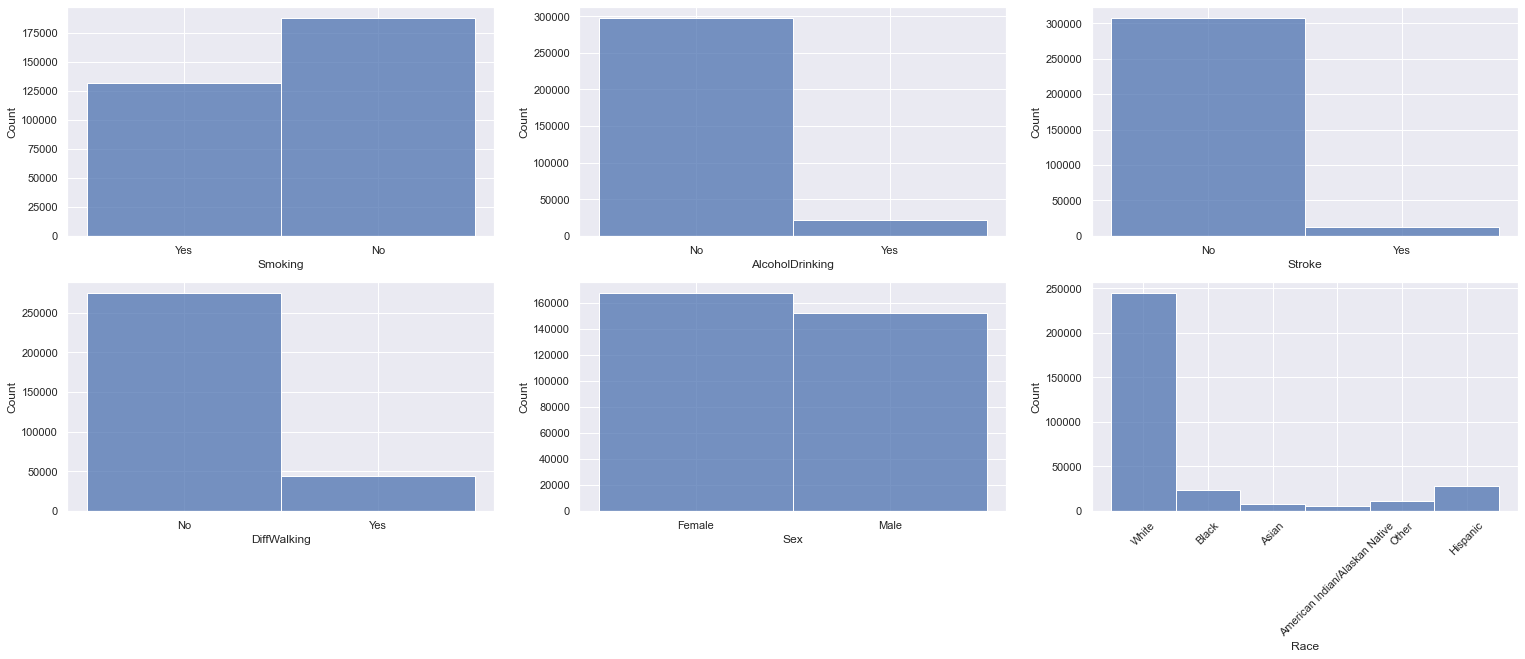

In [6]:
sns.set(rc={'figure.figsize':(26,9.27)})

plt.subplot(231)
sns.histplot(data=df, x="Smoking")
plt.subplot(232)
sns.histplot(data=df, x="AlcoholDrinking")
plt.subplot(233)
sns.histplot(data=df, x="Stroke")
plt.subplot(234)
sns.histplot(data=df, x="DiffWalking")
plt.subplot(235)
sns.histplot(data=df, x="Sex")
plt.subplot(236)
sns.histplot(data=df, x="Race")
plt.xticks(rotation=45)

Zunächst einmal sind in etwas gleich viele Männer wie Frauen in dem Datensatz enthalten. Der Frauenanteil ist nur geringfügig höher. Allerdings ist der Datensatz hinsichtlich der Rasse stark unausgeglichen. Über 75% der Probanden waren Weißhäutig, nur ca. 8% schwarzhäutig und 9% hispanoamerianer. Andere Rassen wie beispielsweise die Asiaten sind in dem Datensatz stark unterräpresentiert. Eine Aussage über den Einfluss der Rasse auf die Wahrscheinlichkeit eines Herzinfaktes ist also nur bedingt möglich und sollte mit Vorsicht behandelt werden.

Weiterhin wird ersichtlich, dass ca. 40% der Probanden angeben zu Rauchen. Nur 7% der Probanden geben an regelmäßig Alkohol zu trinken. 4% der Probanden haben bereits einen Schlaganfall erlitten und 14% haben starke Probleme beim Treppensteigen.

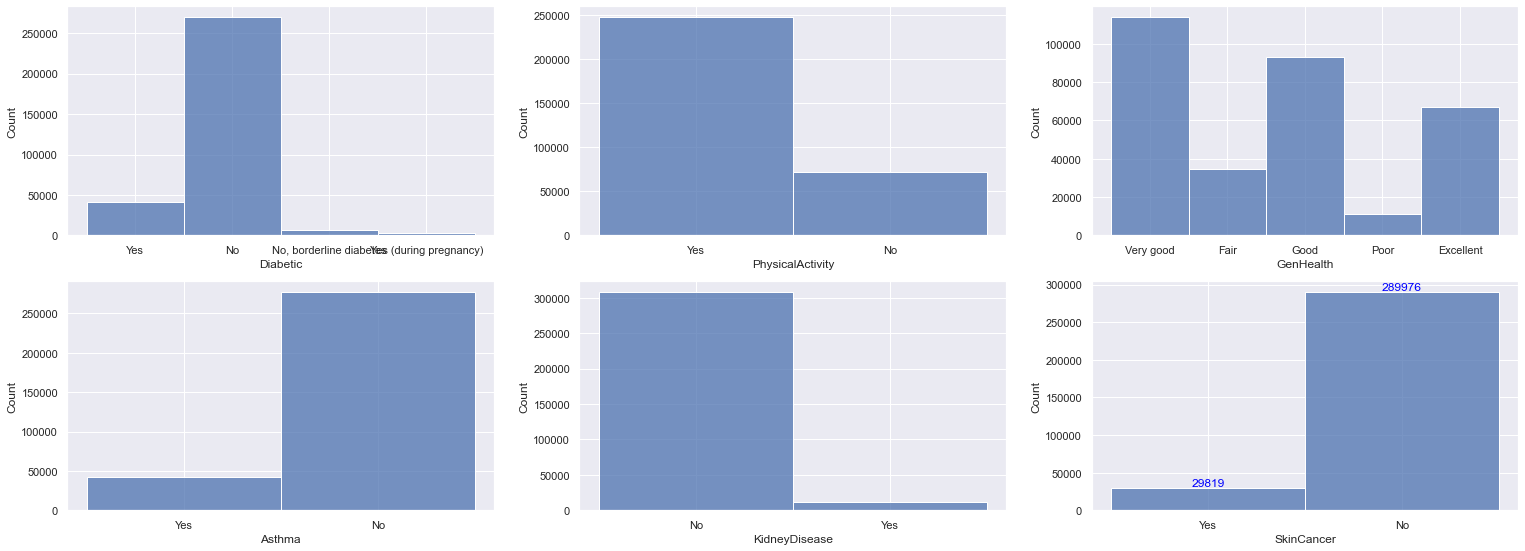

In [7]:
plt.subplot(231)
sns.histplot(data=df, x="Diabetic")
plt.subplot(232)
sns.histplot(data=df, x="PhysicalActivity")
plt.subplot(233)
sns.histplot(data=df, x="GenHealth")
plt.subplot(234)
sns.histplot(data=df, x="Asthma")
plt.subplot(235)
sns.histplot(data=df, x="KidneyDisease")
plt.subplot(236)
ax = sns.histplot(data=df, x="SkinCancer")

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='blue', ha='center', va='bottom')

Ca. 12% der Probanden leiden unter Diabetis. Ein geringer Teil der Frauen hab außerdem an, an Diabetis während der Schwangerschaft gelitten zu haben. 
Ein Großteil der Befragten gibt an sportlich aktiv zu sein. Allerdings sind 23% sportlich unaktiv.

Fast 85% der Probanden ordnet die eigene Gesundheit als Exzellent, sehr gut, oder gut ein. Entsprechend geben nur 15% der Probanden an, sich gesundheitlich nicht so wohl zu fühlen. 
13% geben an Asthma zu haben, 3% besitzen eine Nierenerkrankung. Darüber hinaus haben oder hatten 9% der Probanden bereits Hautkrebs.

### Kontinuierliche Variablen

Für die Betrachtung der kontinuierlichen Variablen bieten sich sowohl Histogramme und auch Boxplots an.<br>
Boxplots sind Diagramme, die zur graphischen Darstellung der Verteilung von mindestens ordinalskalierten Merkmalen verwendet werden. Es fasst dabei verschiedene Streuungs- und Lagemaße in einer Darstellung zusammen. Ein Box-Plot soll schnell einen Eindruck darüber vermitteln, in welchem Bereich die Daten liegen und wie sie sich über diesen Bereich verteilen.

Ein Boxplot fasst folgende Werte in einer Darstellung zusammen:
- Minimum
- Unteres Quartil (Q1)
- Median
- Oberes Quartil (Q3)
- Maximum
- Spannweite
- Interquartilsabstand (IQR)

Darüber hinaus werden extreme Ausreißer (Q3 + 1.5 * IQR) in den Daten als Punkte dargestellt.

Ein Histogramm liefert darüber hinaus die grafische Darstellung der absoluten oder relativen Häufigkeitsverteilung eines quantitativen, klassierten Merkmals in einem speziellen Säulendiagramm: Der Flächeninhalt der einzelnen (aneinandergrenzenden) Säulen gibt die Häufigkeit der jeweiligen Klassen wider.

<AxesSubplot:xlabel='BMI', ylabel='Count'>

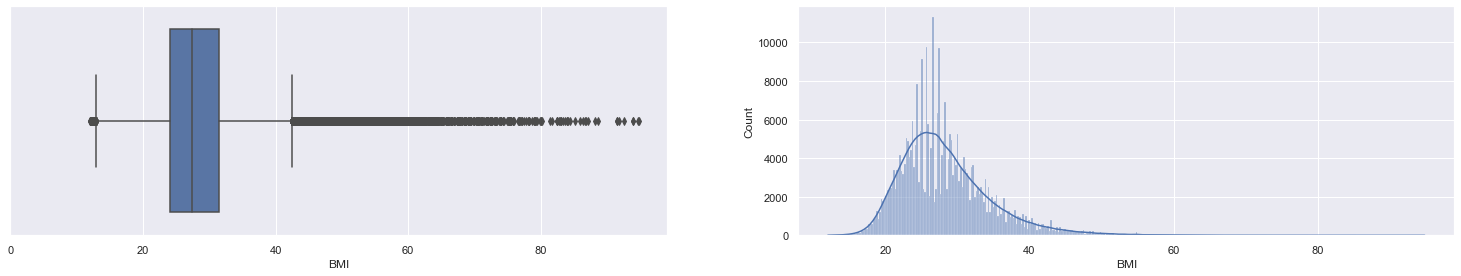

In [8]:
# BMI
sns.set(rc={'figure.figsize':(40,9.27)})

plt.subplot(231)
sns.boxplot(data=df, x="BMI")
plt.xlim(0, None)
plt.subplot(232)
sns.histplot(data=df, x="BMI", kde=True)

50% der Probanden weisen einen BMI zwischen 24 und 31 auf. Das Minimum liegt bei einem BMI von 12, das Maximum hingegen bei 94,8. Der Median des BMI liegt bei 27.

Auffällig ist, dass viele Datenpunkte außerhalb des oberen Quartils liegen und damit als Außreißer bzw. als Punkt dargestellt werden. Es gibt demnach viele Probanden die einen sehr hohen BMI aufweisen, die nach Definition von Boxplots als Ausreißer gelten.
Der Großteil der Probanden weißt allerdings einen BMI zwischen 20 und 40 auf, wie aus dem Histogramm hervorgeht.

<AxesSubplot:xlabel='PhysicalHealth', ylabel='count'>

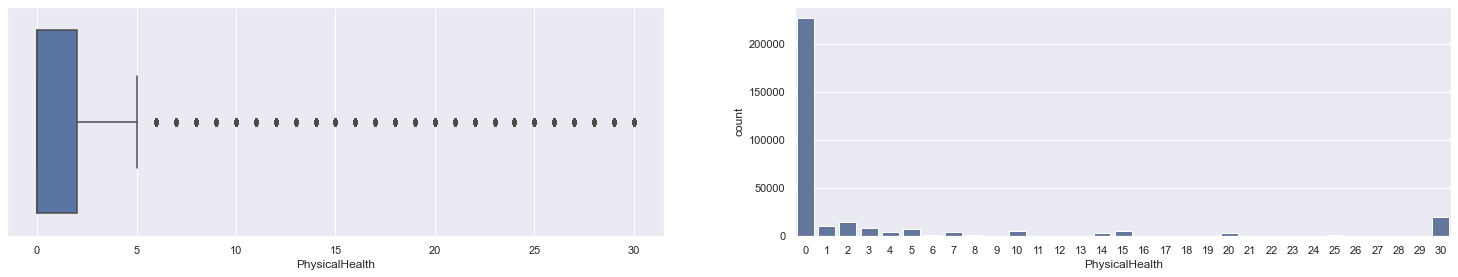

In [9]:
## PhysicalHealth

plt.subplot(231)
sns.boxplot(data=df, x="PhysicalHealth")
plt.subplot(232)
sns.countplot(x=df["PhysicalHealth"].astype(int), color='#5975a4')

Die breite Masse der Probanden hat angegeben in den letzten 30 Tagen keine körperlichen Beschwerden gehabt zu haben.<br>
Aus dem Histogramm geht allerdings eine Auffälligkeit hervor: Ca. 20.000 Probanden haben angegeben an 30 von 30 Tagen körperliche Beschwerden zu haben. Es scheint also so, als hätten einige Probanden jeden Tag Beschwerden.

<AxesSubplot:xlabel='MentalHealth', ylabel='count'>

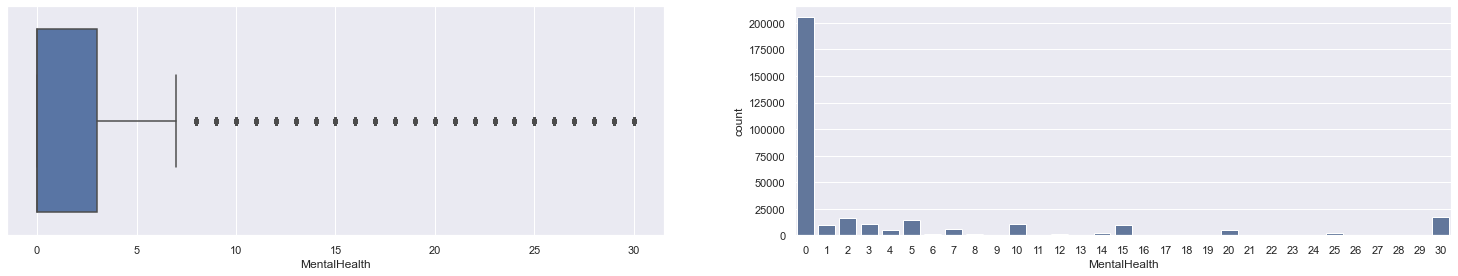

In [10]:
## MentalHealth

plt.subplot(231)
sns.boxplot(data=df, x="MentalHealth")
plt.subplot(232)
sns.countplot(x=df["MentalHealth"].astype(int), color='#5975a4')

Die Analyse der mentalen Gesundheit der Probanden zeigt ein ähnliches Bild wie bei der physischen Gesundheit. Die meisten Probanden geben an, keine mentalen Beschwerden zu haben, bzw. haben Beschwerden nur an wenigen (<5) Tagen im Monat. <br>
Allerdings geht auch hier aus dem Histogramm hervor, dass ca. 20.000 Probanden angeben, an 30 von 30 Tagen mentale Beschwerden zu haben.

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

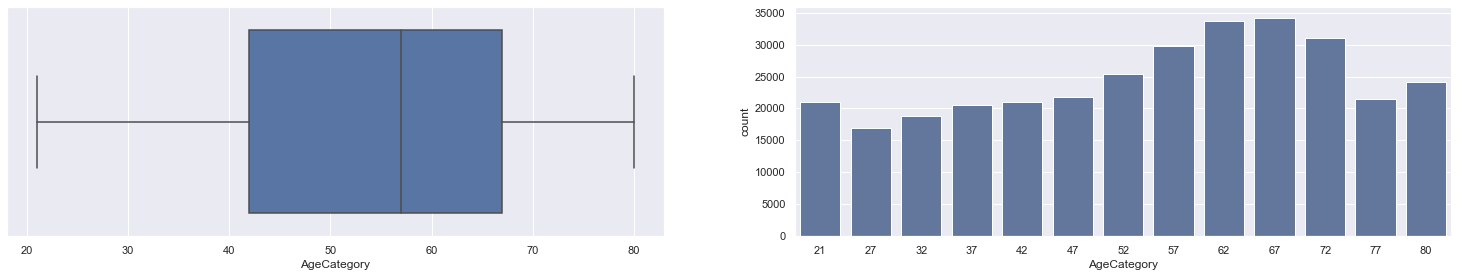

In [11]:
## AgeCategory

plt.subplot(231)
sns.boxplot(data=df, x="AgeCategory")
plt.subplot(232)
sns.countplot(x=df["AgeCategory"].astype(int), color='#5975a4')

Die Analyse der Alterstruktur der Probanden zeigt, dass ältere Menschen überräpresentiert sind. 50% der Probanden sind zwischen 42 und 67 Jahre alt. Aus dem Historgramm wird ebenso ersichtlich, dass vor allem die Alterklassen 57 - 72 deutlich mehr Probanden aufweisen, als andere Alterklassen.

Vor allem hinsichtlich der Vorhersage der Wahrscheinlichkeit eines Herzinfaktes könnte dies Schwierigkeiten hervorrufen, da ältere Menschen vermutlich gefährdeter für einen Herzinfakt sind als jüngere.

<AxesSubplot:xlabel='SleepTime', ylabel='count'>

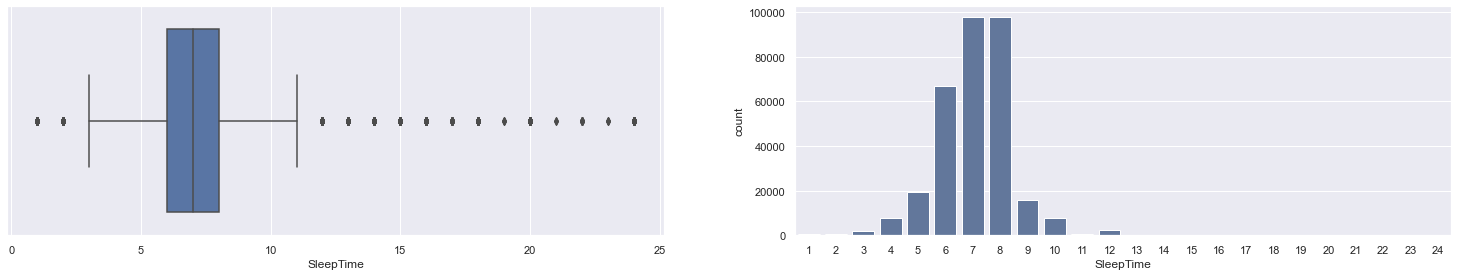

In [12]:
## SleepTime

plt.subplot(231)
sns.boxplot(data=df, x="SleepTime")
plt.subplot(232)
sns.countplot(x=df["SleepTime"].astype(int), color='#5975a4')

Die Analysen zeigen, dass die große Massen an Probanden zwischen 5 und 9 Stunden im Durchschnitt pro Tag schläft. Vereinzelnt schlafen die Menschen nur 4 Stunden oder sogar 10 Stunden.

Allerdings werden auch hier starke Ausreißer sichtbar. Das Minimum der Schlafzeit liegt bei 1, das Maximum bei 24. Dies sind unrealistische Werte in dem Datensatz. Kein Mensch schafft es nur 1 Stunden pro Tag im Schnitt zu schlafen. Genauso unrealistisch ist es, 24 Stunden im Schnitt - und damit den gesamten Tag - zu schlafen. 

Hier sollte im Folgenden überlegt werden, ob diese Ausreißer aus dem Datensatz gefiltert werden, da sie bei der Vorhersage Probleme bereiten könnten.

### Zielvariable

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

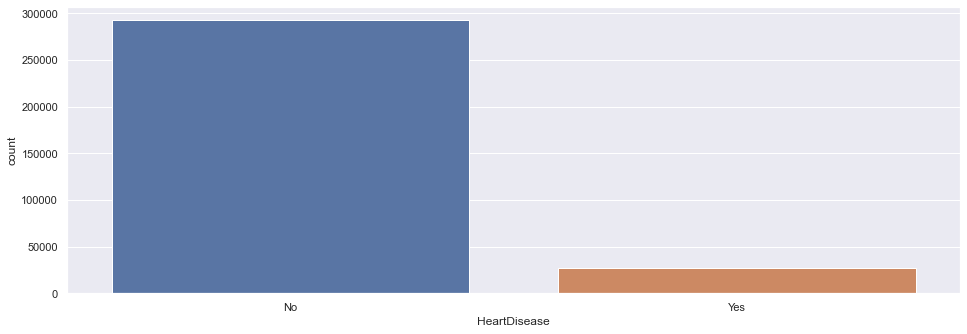

In [13]:
sns.set(rc={'figure.figsize':(16, 5.27)})
sns.countplot(x="HeartDisease", data=df)

Die Analyse der Zielvariable *HeartDisease* zeigt, dass nur etwa 8% der Probanden einen Herzinfakt erlitten haben. Die allermeisten Probanden haben noch keinen Herzinfakt erlitten.

## Bivariate Analyse der Spalten

Im Anschluss an die unvariate Analyse folgt die bivariate Analyse der Spalten. Der Fokus liegt hier in der Suche nach Beziehungen zwischen 2 oder mehr Spalten. Genauer gesagt ist das Ziel, eine Beziehung zischen der Zielvariabel *HeartDisease* und einer beschreibenden Variable wie z.B. *Smoking* zu finden. Es wird also eine Art empirische Beziehung zwischen den Variablen ermittelt.

Außerdem werden Korrelationen zwischen den beschreibenden Variablen ermittelt. Eine hohe Korrelation zweier Variablen sagt aus, dass die eine Variable die andere bedingt.

Vor der bivariaten Analyse werden allerdings noch Hypothesen aufgestellt, die eine Richtung bei der Analyse der Daten vorgeben. Man stellt also Vermutungen zu den Daten auf, die im Anschluss mittels Analysen und Visualisierung belegt oder wiederlegt werden.

**Hypthesen**:

1. Menschen mit einem ungesunden Lebensstil haben ein höheres Risiko, einen Herzinfakt zu erleiden. Zu einem ungesunden Lebenstil gehört das Rauchen, ein hoher BMI, oder andere Eigenschaften wie z.B. wenig Schlafzeit, oder das regelmäßige Konsumieren von Alkohol.
2. Anzeichen des Körpers, wie z.B. eine beeinträchtigte physische Gesundheit oder ein erschwertes Treppensteigen, deuten auf einen Herzinfakt hin.
3. Menschen in einem höheren Alter erleiden häufiger einen Herzinfakt.
4. Menschen, die bereits einen Schlaganfall erlitten haben, haben ein höheres Risiko auch einen Herzinfakt zu erleiden.
5. Das Geschlecht hat keinen signifikanten Einfluss auf die Wahrscheinlichkeit, einen Herzinfakt zu bekommen.

### Kategorische Variablen

In [14]:
def calculate_probability(data_frame, variable):
    categories_of_variable = data_frame[variable].unique().tolist()
    
    for category in categories_of_variable:
        category_and_heart_disease = len(data_frame[(data_frame['HeartDisease']=='Yes') & (data_frame[variable]==category)])
        total_of_category = len(data_frame[data_frame[variable]==category])
        
        print("Wahrscheinlichkeit für einen Herzinfakt, wenn " + variable + " die Ausprägung " + category + " hat: ", str(round(category_and_heart_disease * 100 / total_of_category, 2)) + " %")

Wahrscheinlichkeit für einen Herzinfakt, wenn Smoking die Ausprägung Yes hat:  12.16 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Smoking die Ausprägung No hat:  6.03 %


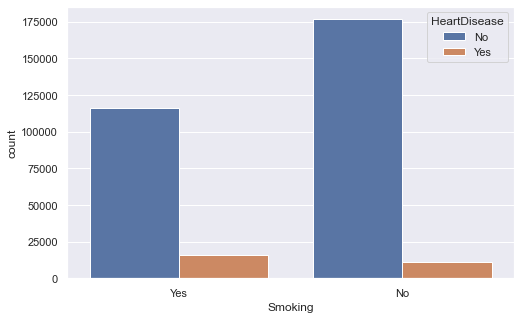

In [15]:
sns.set(rc={'figure.figsize':(8, 5)})

sns.countplot(x="Smoking", hue='HeartDisease', data=df)
calculate_probability(df, 'Smoking') 


Wahrscheinlichkeit für einen Herzinfakt, wenn AlcoholDrinking die Ausprägung No hat:  8.8 %
Wahrscheinlichkeit für einen Herzinfakt, wenn AlcoholDrinking die Ausprägung Yes hat:  5.24 %


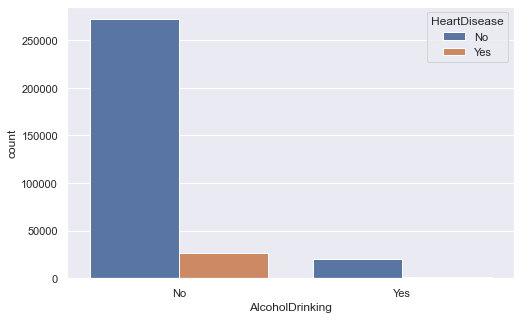

In [16]:
sns.countplot(x="AlcoholDrinking", hue='HeartDisease', data=df)
calculate_probability(df, 'AlcoholDrinking') 

Wahrscheinlichkeit für einen Herzinfakt, wenn Stroke die Ausprägung No hat:  7.47 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Stroke die Ausprägung Yes hat:  36.37 %


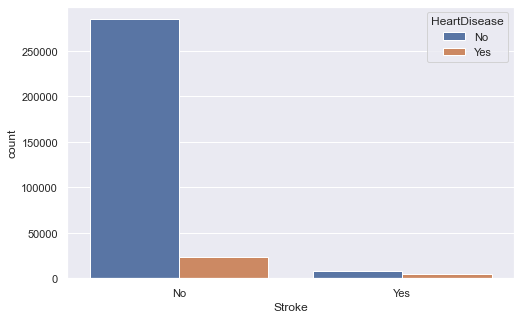

In [17]:
sns.countplot(x="Stroke", hue='HeartDisease', data=df)
calculate_probability(df, 'Stroke') 

Wahrscheinlichkeit für einen Herzinfakt, wenn DiffWalking die Ausprägung No hat:  6.3 %
Wahrscheinlichkeit für einen Herzinfakt, wenn DiffWalking die Ausprägung Yes hat:  22.58 %


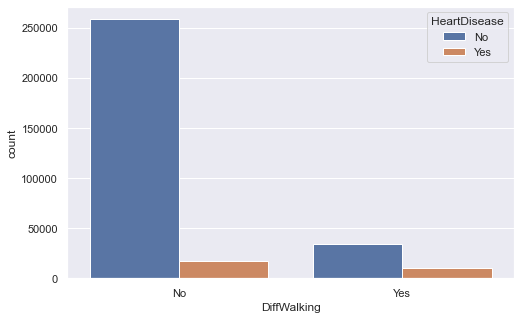

In [18]:
sns.countplot(x="DiffWalking", hue='HeartDisease', data=df)
calculate_probability(df, 'DiffWalking') 

Wahrscheinlichkeit für einen Herzinfakt, wenn Sex die Ausprägung Female hat:  6.69 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Sex die Ausprägung Male hat:  10.62 %


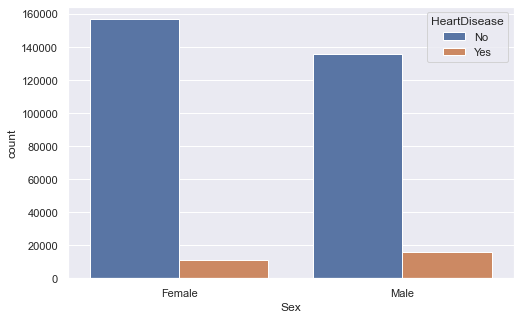

In [19]:
sns.countplot(x="Sex", hue='HeartDisease', data=df)
calculate_probability(df, 'Sex') 

Wahrscheinlichkeit für einen Herzinfakt, wenn Race die Ausprägung White hat:  9.18 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Race die Ausprägung Black hat:  7.54 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Race die Ausprägung Asian hat:  3.3 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Race die Ausprägung American Indian/Alaskan Native hat:  10.42 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Race die Ausprägung Other hat:  8.11 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Race die Ausprägung Hispanic hat:  5.26 %


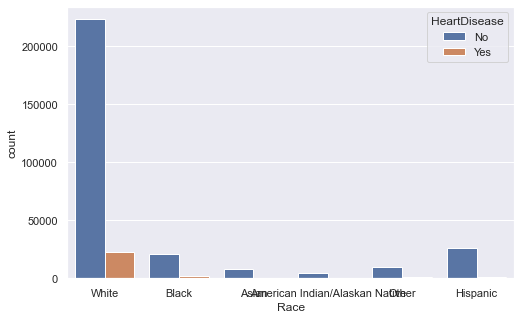

In [20]:
sns.countplot(x="Race", hue='HeartDisease', data=df)
calculate_probability(df, 'Race') 

Wahrscheinlichkeit für einen Herzinfakt, wenn Diabetic die Ausprägung Yes hat:  21.95 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Diabetic die Ausprägung No hat:  6.5 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Diabetic die Ausprägung No, borderline diabetes hat:  11.64 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Diabetic die Ausprägung Yes (during pregnancy) hat:  4.22 %


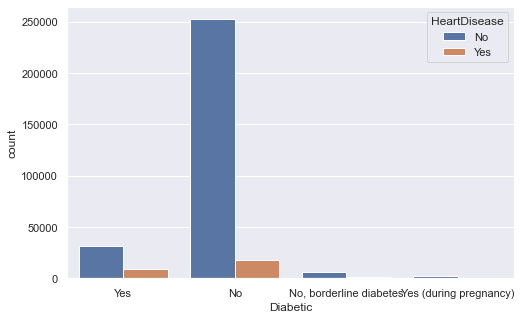

In [21]:
sns.countplot(x="Diabetic", hue='HeartDisease', data=df)
calculate_probability(df, 'Diabetic')

Wahrscheinlichkeit für einen Herzinfakt, wenn PhysicalActivity die Ausprägung Yes hat:  7.05 %
Wahrscheinlichkeit für einen Herzinfakt, wenn PhysicalActivity die Ausprägung No hat:  13.76 %


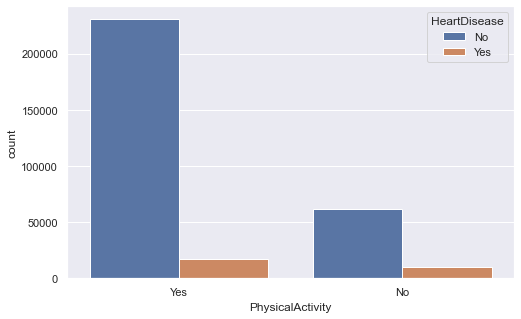

In [22]:
sns.countplot(x="PhysicalActivity", hue='HeartDisease', data=df)
calculate_probability(df, 'PhysicalActivity')

Wahrscheinlichkeit für einen Herzinfakt, wenn GenHealth die Ausprägung Very good hat:  4.73 %
Wahrscheinlichkeit für einen Herzinfakt, wenn GenHealth die Ausprägung Fair hat:  20.43 %
Wahrscheinlichkeit für einen Herzinfakt, wenn GenHealth die Ausprägung Good hat:  10.26 %
Wahrscheinlichkeit für einen Herzinfakt, wenn GenHealth die Ausprägung Poor hat:  34.1 %
Wahrscheinlichkeit für einen Herzinfakt, wenn GenHealth die Ausprägung Excellent hat:  2.24 %


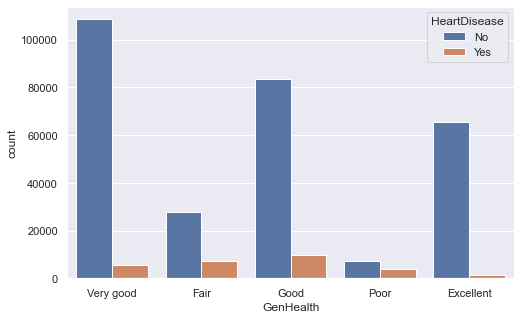

In [23]:
sns.countplot(x="GenHealth", hue='HeartDisease', data=df)
calculate_probability(df, 'GenHealth')

Wahrscheinlichkeit für einen Herzinfakt, wenn Asthma die Ausprägung Yes hat:  11.51 %
Wahrscheinlichkeit für einen Herzinfakt, wenn Asthma die Ausprägung No hat:  8.1 %


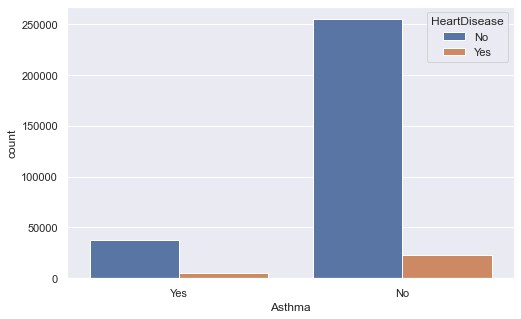

In [24]:
sns.countplot(x="Asthma", hue='HeartDisease', data=df)
calculate_probability(df, 'Asthma')

Wahrscheinlichkeit für einen Herzinfakt, wenn KidneyDisease die Ausprägung No hat:  7.77 %
Wahrscheinlichkeit für einen Herzinfakt, wenn KidneyDisease die Ausprägung Yes hat:  29.33 %


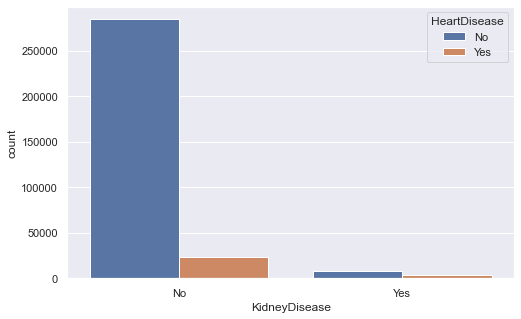

In [25]:
sns.countplot(x="KidneyDisease", hue='HeartDisease', data=df)
calculate_probability(df, 'KidneyDisease')

Wahrscheinlichkeit für einen Herzinfakt, wenn SkinCancer die Ausprägung Yes hat:  16.7 %
Wahrscheinlichkeit für einen Herzinfakt, wenn SkinCancer die Ausprägung No hat:  7.72 %


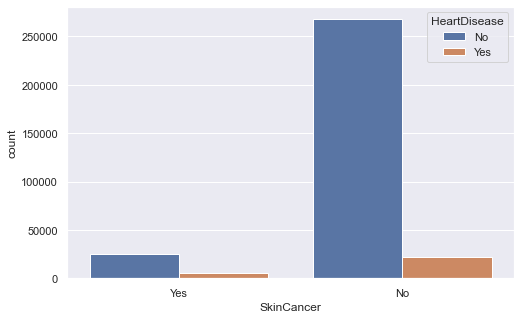

In [26]:
sns.countplot(x="SkinCancer", hue='HeartDisease', data=df)
calculate_probability(df, 'SkinCancer')

### Kontinuierliche Variablen

<AxesSubplot:xlabel='HeartDisease', ylabel='BMI'>

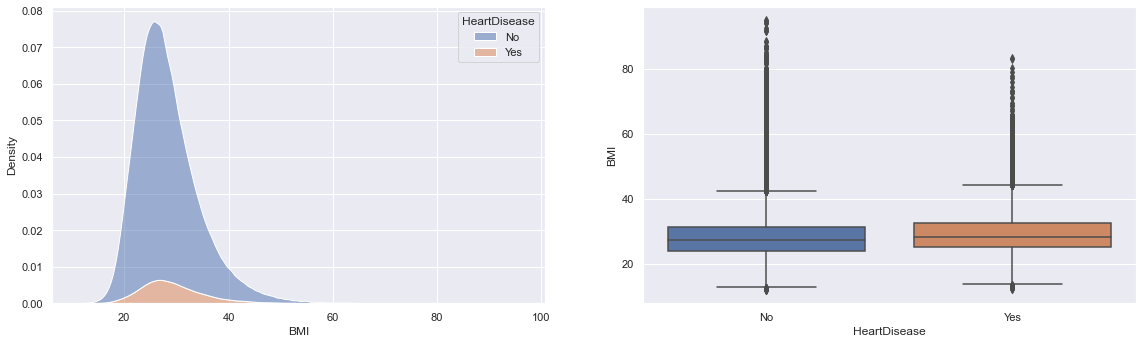

In [27]:
sns.set(rc={'figure.figsize':(30, 12)})
plt.subplot(232)
sns.kdeplot(data=df, x="BMI", hue="HeartDisease", alpha=0.5, shade=True, multiple="stack")
plt.subplot(233)
sns.boxplot(x=df['HeartDisease'], y=df['BMI'])

<AxesSubplot:xlabel='HeartDisease', ylabel='PhysicalHealth'>

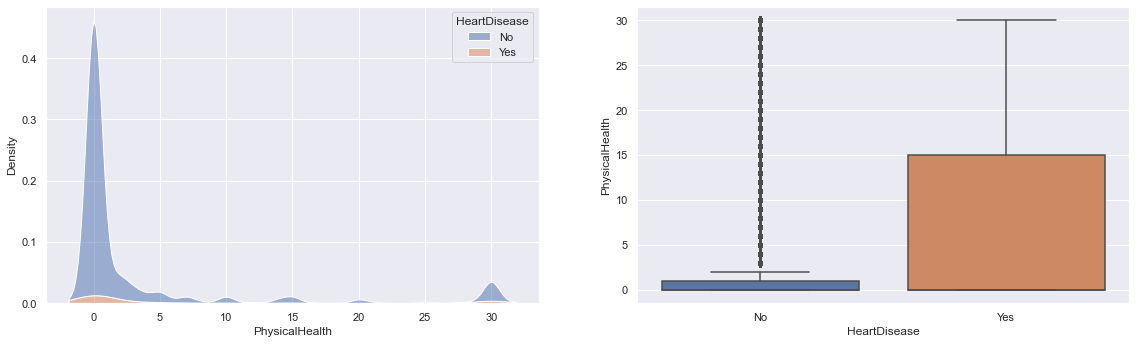

In [28]:
plt.subplot(232)
sns.kdeplot(data=df, x="PhysicalHealth", hue="HeartDisease", alpha=0.5, shade=True, multiple="stack")
plt.subplot(233)
sns.boxplot(x=df['HeartDisease'], y=df['PhysicalHealth'])

<AxesSubplot:xlabel='HeartDisease', ylabel='MentalHealth'>

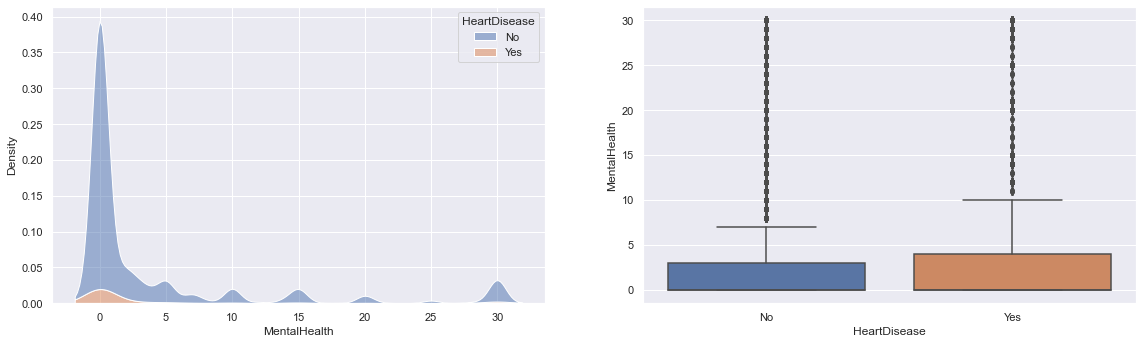

In [29]:
plt.subplot(232)
sns.kdeplot(data=df, x="MentalHealth", hue="HeartDisease", alpha=0.5, shade=True, multiple="stack")
plt.subplot(233)
sns.boxplot(x=df['HeartDisease'], y=df['MentalHealth'])

<AxesSubplot:xlabel='HeartDisease', ylabel='AgeCategory'>

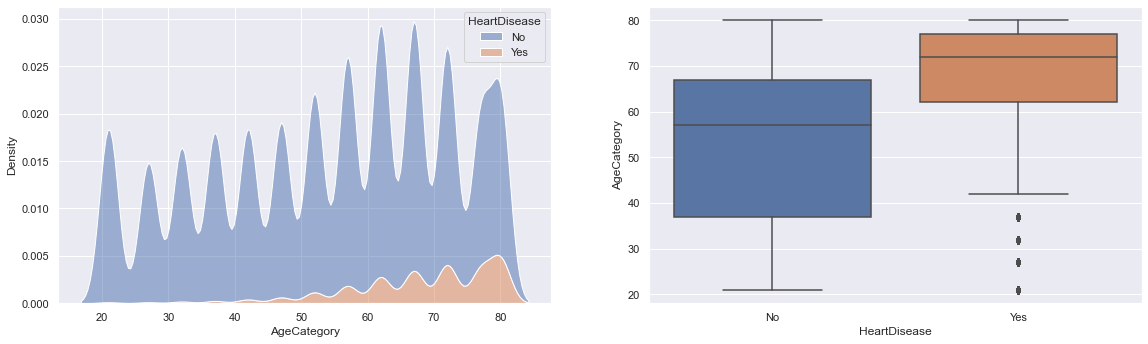

In [30]:
plt.subplot(232)
sns.kdeplot(data=df, x="AgeCategory", hue="HeartDisease", alpha=0.5, shade=True, multiple="stack")
plt.subplot(233)
sns.boxplot(x=df['HeartDisease'], y=df['AgeCategory'])

<AxesSubplot:xlabel='HeartDisease', ylabel='SleepTime'>

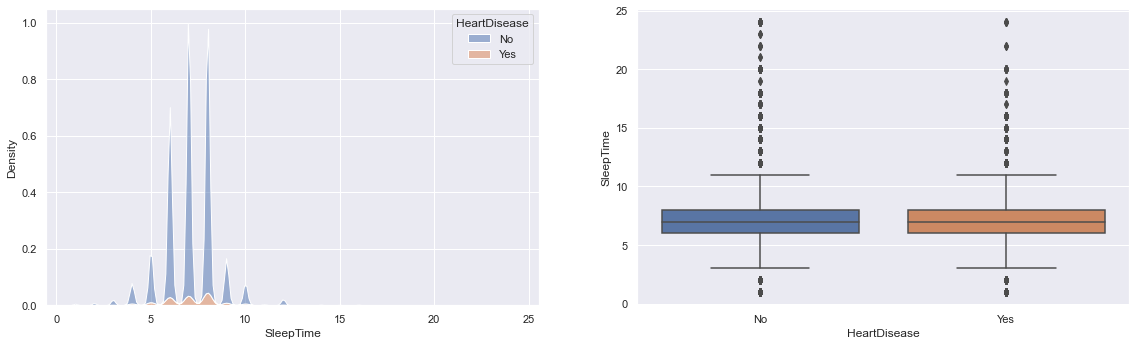

In [31]:
plt.subplot(232)
sns.kdeplot(data=df, x="SleepTime", hue="HeartDisease", alpha=0.5, shade=True, multiple="stack")
plt.subplot(233)
sns.boxplot(x=df['HeartDisease'], y=df['SleepTime'])

### Korrelationsmatrix

Mit einer Korrelationsmatrix können die Korrelationen zwischen einzelnen Variablen dargestellt werden. Eine Korrelation misst die Stärke einer statistischen Beziehung von zwei Variablen zueinander.
Je höher der Korrelationskoeffizient ist, desto stärker ist die Beziehung zwischen den Variablen. Bei einem Wert von 1 bedeutet dies, das die eine Variable die andere Variable bedingt.

Die Korrelationsmatrix wird mithilfe der Funktion .corr() der Bibliothek pandas erstellt. Diese akzeptiert lediglich numerische Werte, alle anderen Werte oder Spalten werden automatisch exkludiert oder ignoriert. Damit auch die anderen Spalten aus dem Datensatz berücksichtigt werden, werden folgende Vorverarbeitungen an dem Datensatz vorgenommen:
- **Standardisierung** der kontinuierlichen / numerischen Spalten
- **IntegerEncode** Spalten mit 2 Ausprägungen
- **OneHotEncode** Spalten mit mehr als 2 Ausprägungen

Diese Vorverarbeitungen sind auch sinnvoll für Machine Learning Modelle. ML-Modelle können häufig besser mit Variablen umgehen, die zum einen standardisiert wurden und zumdem numerisch sind. Die Vorhersageperformance vieler ML-Modelle kann mit diesen einfachen Schritten verbessert werden.

**StandardScaler**:<br>

Kontinuierliche Variablen in einem Dataset weisen oft unterschiedliche Skalen auf. So hat die Variable **BMI** beispielsweise eine Skala von 12.02 bis 94.85, die Variable **SleepTime** hingegen eine Skala von 1 bis 24. Dies kann die Vorhersageperformance viele Machine Learning Modelle beeinträchtigen. Nicht skalierte Daten können auch die Konvergenz vieler gradientenbasierter Modelle verlangsamen oder sogar verhindern.

<div>
<img src="StandardScaler.png" width="400"/>
</div>

**IntegerEncode**:<br>

Binäre Spalten in dem Datensatz, wie z.B. *Smoking* (Yes, No) werden durch das IntegerEncode in 0 und 1 umgewandelt. Für die Werte "Yes" wird entsprechend eine 1 gesetzt, für die Werte "No" eine 0.

**OneHotEncoding**:<br>

Viele Machine Learning Modelle können nur schwer mit kategorischen Daten als Input umgehen. Ähnlich wie bei den kontinuierlich Variablen ist auch hier das Problem, dass einige Variablen nur 2 Ausprägungen besitzen, andere dafür aber 20 oder mehr. 
Viel besser können Machine Learning Modelle mit numerischen Werte umgehen.

Beim OneHotEncoding wird jeder kategorische Wert in eine neue kategorische Spalte umgewandelt und diesen Spalten ein binärer Wert von 1 oder 0 zugewiesen. Pro Ausprägung einer Spalte existiert nach Anwendung des OneHotEncoding demnach eine neue Spalte im Datensatz

<div>
<img src="one_hot_encoding.png" width="700"/>
</div

#### Standardisierung der Variablen

In [32]:
## Standardisierung der kontinuierlichen Variablen

Scaler = StandardScaler()
df[con_cols] = Scaler.fit_transform(df[con_cols])

df[con_cols].head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
0,-1.844750,-0.046751,3.281069,0.149220,-1.460354
1,-1.256338,-0.424070,-0.490039,1.447159,-0.067601
2,-0.274603,2.091388,3.281069,0.713541,0.628776
3,-0.647473,-0.424070,-0.490039,1.277863,-0.763977
4,-0.726138,3.097572,-0.490039,-0.697262,0.628776


Nach Anwendung des StandardScaler haben alle kontinuierlichen Variabeln einen Durchschnitt von 0 (µ = 0) und eine Standardabweichung von 1 (σ = 1). 

#### OneHotEncoding

In [33]:
# Integer encode columns with 2 unique values
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if df[col].dtype == 'O':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# One-hot encode columns with more than 2 unique values
df = pd.get_dummies(df, columns=['Race', 'Diabetic', 'GenHealth', ], prefix = ['Race', 'Diabetic', 'GenHealth'])

In [35]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,0,0.149220,...,1,0,0,1,0,0,0,0,0,1
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,0,1.447159,...,1,1,0,0,0,0,0,0,0,1
2,0,-0.274603,1,0,0,2.091388,3.281069,0,1,0.713541,...,1,0,0,1,0,0,1,0,0,0
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,0,1.277863,...,1,1,0,0,0,0,0,1,0,0
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,0,-0.697262,...,1,1,0,0,0,0,0,0,0,1


Nach Anwendung des OneHotEncoding gibt es neue Spalten wie z.B. die Spalte **Race_White**, die die Ausprägungen 0 und 1 besitzt. Für alle kategorischen Werte der Spalten 'Race', 'Diabetic' und 'GenHealth' gibt es nun eine dedizierte Spalte mit den Werte 0 und 1.

Nun kann die Korrelationsmatrix erstellt werden. Hierfür wird wie oben beschrieben die Funktion .corr() auf das DataFrame angewendet. Anschließend wird die Korrelationsmatrix - die zunächst als einfache Tabelle vorliegt - mithilfe der Bibliothek **seaborn** visualisiert. Hierfür gibt es die Funktion *heatmap*.

<AxesSubplot:>

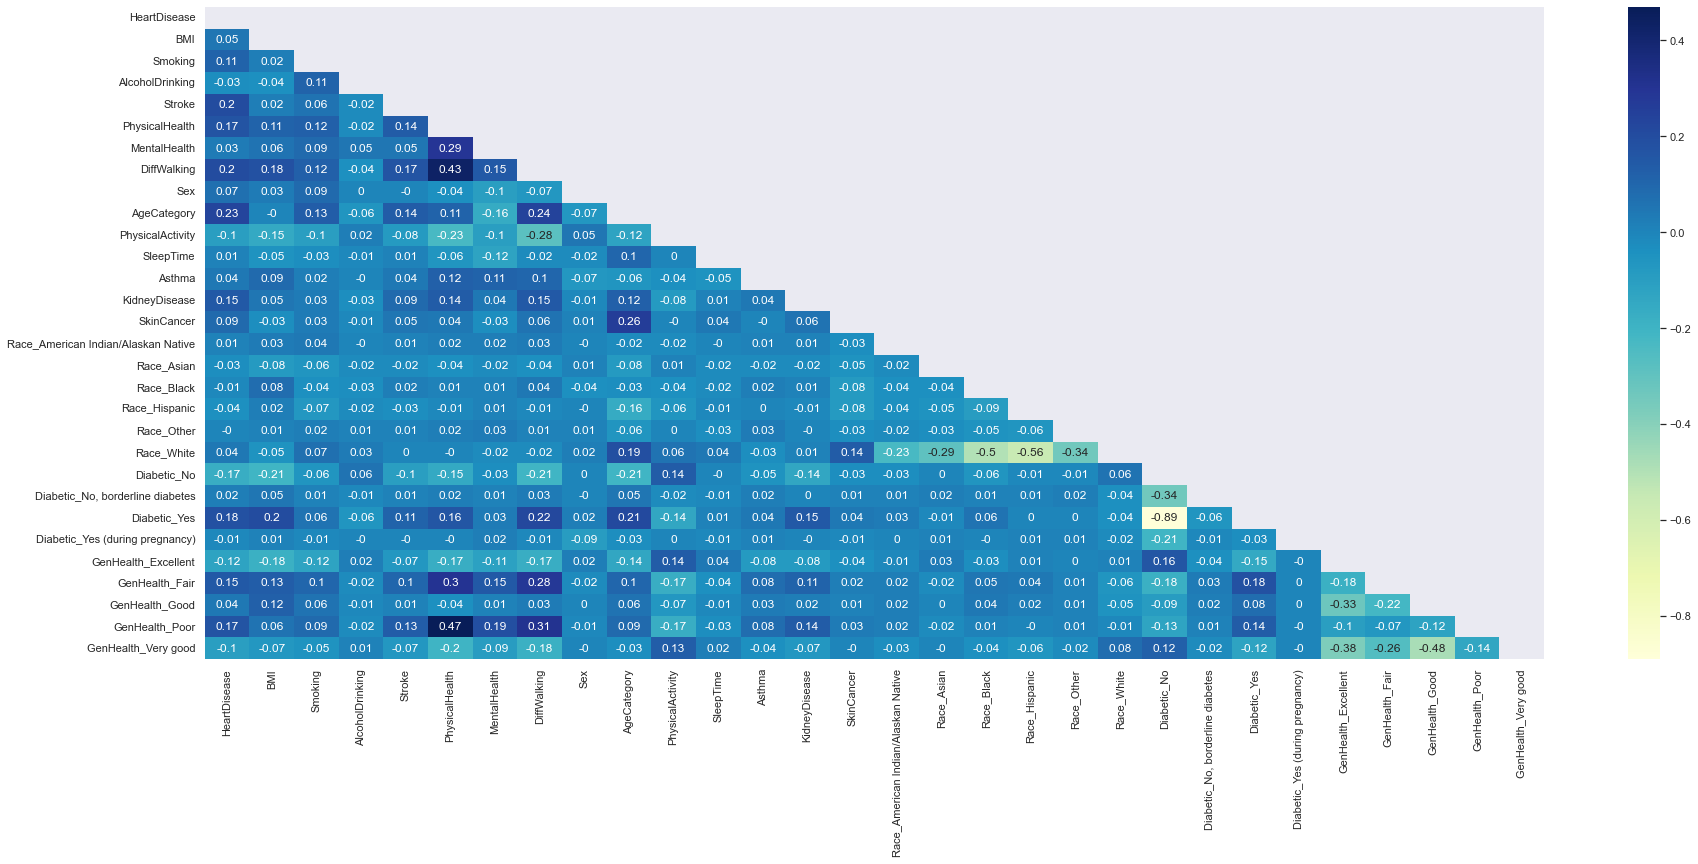

In [40]:
## Korrelationsmatrix erstellen.
correlation = df.corr().round(2)

## Maske für Heatmap erstellen, um die Werte oberhalb der Hauptdiagonale auszublenden.
mask = np.triu(np.ones_like(correlation))
sns.heatmap(correlation,annot=True ,cmap='YlGnBu', mask=mask)

## Machine Learning Modell erstellen

Bislang wurden die Daten analysiert mithilfe von verschiedenen Visualisierungen. Dabei wurde ein Verständnis für die Daten entwickelt.
Nun soll für die Vorhersage der Zielvariable **HeartDisease** ein bzw. mehrere Machine Learning Modelle erstellt werden. Dabei werden verschiedene Verfahren betrachtet, um zu ermitteln, welches der Verfahren die besten Ergebnisse erzielt. Dies ist ein gängiges Vorgehen im Data Science Bereich, da sich die Modelle je nach Datensatz unterschiedlich verhalten können.

Verwendete Machine Learning Modelle:
- K nächste Nachbarn (KNN)
- DecisionTree
- RandomForest
- Support Vector Machine
- Neurales Netz


Nachdem die letzten Vorbereitung der Daten für die Machine Learning Modelle vorgenommen wurden, werden die Daten nun in Trainings- und Testdaten unterteilt. Dies ist ebenfalls ein weit verbreitetes Vorgehen im Data Science Umfeld.
Die Idee ist, das Modell auf einem Teil der Daten zu trainieren (Trainingsdaten) und das Modell anschließend auf einem Datensatz zu testen, dass das Modell zuvor noch nicht gesehen hat (Testdaten). 

Eine gängige Aufteilung ist hierbei 80/20, wobei 80% Trainingsdaten und 20% Testdaten verwendet werden. Für die Aufteilung wird die Funktion *train_test_split* der Bibliothek sklearn verwendet, die mit nur wenig Input Parametern die Aufteilung der Daten übernimmt.

In [42]:
## Aufteilung des DataFrame in Trainings- und Testdaten

# DataFrame mit Feature-Spalten erstellen
features = df.drop(columns =['HeartDisease'], axis = 1)

# DataFrame mit Zielvariable erstellen 
target = df['HeartDisease']

# Erstellen der DataFrames für Trainings- und Testdaten
# shuffle = True -> Die Daten werden vor der Zuteilung zufällig verteilt.
# test_size = .2 -> Die größe des Testdatensatzes soll 20% der Gesamtgröße ausmachen.
# random_state = 44 -> Steuert das Shuffling der Daten. Mit einer festen Zahl werden die Daten immer identisch geshuffelt. Dies ist sinnvoll, um reproduzierbare Ergebnisse der ML-Modelle zu haben.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 29)
Shape of testing feature: (63959, 29)
Shape of training label: (255836,)
Shape of training label: (63959,)


In [ ]:
y_train.head(20)

Für alle ausgewählten Modelle soll nach dem Training eine Validierung der Genauigkeit erfolgen. Da diese Validierung immer nach demselben Schema erfolgt und dieselben Metriken betrachtet werden sollen, wird im folgenden eine Funktion *evaluate_model* erstellt, mit der die Modelle später einfacher validiert werden können, da die Ergebnisse in einer standardisierten Form vorliegen.

In [41]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Vorhersagen für das Modell erstellen
    y_pred = model.predict(x_test)

    # Erstellen der Metriken accuracy, precision, recall, f1-score, und kappa
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'cm': cm}

### KNN

In [ ]:
# Building a model using KNeighborsClassifier 
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Confusion Matrix:\n', knn_eval['cm'])

### Decision Tree

In [45]:
from sklearn import tree

# Building Decision Tree model 
# https://scikit-learn.org/stable/modules/tree.html

clf = tree.DecisionTreeClassifier(max_depth = 3, random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Confusion Matrix:\n', clf_eval['cm'])

Accuracy: 0.9148673368876937
Precision: 0.5051546391752577
Recall: 0.008997429305912597
F1 Score: 0.01767995670214685
Cohens Kappa Score: 0.014743781218029994
Confusion Matrix:
 [[58465    48]
 [ 5397    49]]


In [ ]:
from sklearn import tree
tree.plot_tree(clf,
               feature_names = df.columns,
               class_names = target.astype(str),
               filled = True)

### RandomForest

In [ ]:
# Building RandomForest classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

# Evaluate Model
rfc_eval = evaluate_model(rfc, X_test, y_test)

# Print result
print('Accuracy:', rfc_eval['acc'])
print('Precision:', rfc_eval['prec'])
print('Recall:', rfc_eval['rec'])
print('F1 Score:', rfc_eval['f1'])
print('Cohens Kappa Score:', rfc_eval['kappa'])
print('Confusion Matrix:\n', rfc_eval['cm'])

### Support Vector Machine

<div>
<img src="Support_Vector_Machine.png" width="500"/>
</div>

In [ ]:
# instantiating the object and fitting
# https://scikit-learn.org/stable/modules/svm.html

svc = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = svc.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
import warnings

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(256, activation = 'relu', input_shape=(X_train.shape[1],)))
classifier.add(Dense(515, activation = 'relu'))
classifier.add(Dropout(0.3))
# Adding the second hidden layer
classifier.add(Dense(50, activation = 'relu'))
classifier.add(Dropout(0.3))
# Adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [ ]:
 history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 30, batch_size=15, verbose=1)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)

In [ ]:
classifier.evaluate(X_test)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# Model Losss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
df.head(20)